In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Student_performance_data _.csv")

In [43]:
df.info

<bound method DataFrame.info of       StudentID  Age  Gender         Ethnicity  ParentalEducation  \
0          1001   17  Female         Caucasian                  2   
1          1002   18    Male         Caucasian                  1   
2          1003   15    Male             Asian                  3   
3          1004   17  Female         Caucasian                  3   
4          1005   17  Female         Caucasian                  2   
...         ...  ...     ...               ...                ...   
2387       3388   18  Female         Caucasian                  3   
2388       3389   17    Male         Caucasian                  1   
2389       3390   16  Female         Caucasian                  2   
2390       3391   16  Female  African American                  0   
2391       3392   16  Female         Caucasian                  2   

      StudyTimeWeekly  Absences Tutoring  ParentalSupport  Extracurricular  \
0           19.833723         7      Yes                2    

In [3]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [4]:
df.isna().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [5]:
df.dtypes

StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass           float64
dtype: object

In [6]:
df.Gender = df.Gender.map({0: "Male", 1: "Female"})
df.Ethnicity = df.Ethnicity.map({0: "Caucasian", 1: "African American", 2: "Asian", 3: "Other"})

parent_edu_dict = {0: "None", 1: "High School", 2: "Some College", 3: "Bachelor\'s", 4: "Higher"}
df["ParentalEducationName"] = df.ParentalEducation.apply(lambda x: parent_edu_dict[x])
df.Tutoring = df.Tutoring.map({0: "No", 1: "Yes"})


In [7]:
parent_support_dict = {0: "None", 1: "Low", 2: "Moderate", 3: "High", 4: "Very High"}

df["ParentalSupportName"] = df.ParentalSupport.apply(lambda x: parent_support_dict[x])

In [8]:
df.columns.to_list()

['StudentID',
 'Age',
 'Gender',
 'Ethnicity',
 'ParentalEducation',
 'StudyTimeWeekly',
 'Absences',
 'Tutoring',
 'ParentalSupport',
 'Extracurricular',
 'Sports',
 'Music',
 'Volunteering',
 'GPA',
 'GradeClass',
 'ParentalEducationName',
 'ParentalSupportName']

In [9]:
df.ParentalSupportName.value_counts()

ParentalSupportName
Moderate     740
High         697
Low          489
Very High    254
None         212
Name: count, dtype: int64

In [10]:
extracuricularList = ["Extracurricular", "Sports", "Music",	"Volunteering"]
for el in extracuricularList:
    df[el+"Label"] = df[el].map({0: "No", 1: "Yes"})

In [11]:
df.to_csv("Student_performance_data _new.csv", encoding="utf-8")

In [12]:
# could create abscence classes
# chi2 gradeclass ethnicty

# Parental impact on Students' ]]]
# GPA

Hypothesis:
- Asian students are the most disciplined 
- Asian students perform better
- 

In [13]:
import scipy.stats as stats

# ANOVA: compare mean amoung different groups
# H0: M1 = M2 = M3 =  .. = Mp
# H1: 
# seuil: 5% ~ 0.05, 10% ~ 0.10, 1% ~0.01
# regle de decision: pvalue < seuil, on rejette l'hypothese null.

results = stats.f_oneway(df[df.Ethnicity == "Caucasian"]["Absences"],
                         df[df.Ethnicity == "African American"]["Absences"],
                         df[df.Ethnicity == "Asian"]["Absences"],
                         df[df.Ethnicity == "Other"]["Absences"]
                         )

In [14]:
results

F_onewayResult(statistic=0.9003315133397245, pvalue=0.4402216442932584)

In [15]:
results2 = stats.ttest_ind(df[df.Ethnicity == "Asian"]["Absences"], df[df.Ethnicity != "Asian"]["Absences"])
results2

TtestResult(statistic=-0.2943986420462503, pvalue=0.768478870949711, df=2390.0)

In [16]:
results3 = stats.f_oneway(df[df.Ethnicity == "Caucasian"]["GPA"],
                         df[df.Ethnicity == "African American"]["GPA"],
                         df[df.Ethnicity == "Asian"]["GPA"],
                         df[df.Ethnicity == "Other"]["GPA"]
                         )

results3

F_onewayResult(statistic=0.9581218945870755, pvalue=0.4115850271925584)

In [17]:
results4 = stats.ttest_ind(df[df.Ethnicity == "Asian"]["GPA"], df[df.Ethnicity != "Asian"]["GPA"])
results4

TtestResult(statistic=0.4211528599113535, pvalue=0.6736813341709118, df=2390.0)

In [18]:
# Chi-2 test of independance: verify if 2 categorical variables are independant or not
# H0: the 2 variables are independant
# H1: 

contingency_tbl = pd.pivot_table(df, values="Ethnicity", aggfunc="count", index="Gender", columns="GradeClass")
contingency_tbl


GradeClass,0.0,1.0,2.0,3.0,4.0
Gender,,,,,
Female,49,137,194,213,629
Male,58,132,197,201,582


In [19]:
results5 = stats.chi2_contingency(contingency_tbl)
results5

Chi2ContingencyResult(statistic=1.915372845465341, pvalue=0.7513204328843888, dof=4, expected_freq=array([[ 54.66304348, 137.42391304, 199.75      , 211.5       ,
        618.66304348],
       [ 52.33695652, 131.57608696, 191.25      , 202.5       ,
        592.33695652]]))

In [20]:
contingency_tbl1 = pd.pivot_table(df, values="Ethnicity", aggfunc="count", columns="ParentalSupportName", index="GradeClass")
contingency_tbl1 = contingency_tbl1.loc[:, ["None", "Low", "Moderate", "High", "Very High"]]
contingency_tbl1

ParentalSupportName,None,Low,Moderate,High,Very High
GradeClass,,,,,
0.0,5,14,16,47,25
1.0,8,39,97,92,33
2.0,37,77,125,112,40
3.0,32,89,122,122,49
4.0,130,270,380,324,107


In [21]:
results6 = stats.chi2_contingency(contingency_tbl1)
round(results6[1], 10) # 0.000000002 < 0.05 

2.2e-09

In [22]:
# model

In [23]:
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler


from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

In [24]:
cols = df.columns.to_list()
cols

['StudentID',
 'Age',
 'Gender',
 'Ethnicity',
 'ParentalEducation',
 'StudyTimeWeekly',
 'Absences',
 'Tutoring',
 'ParentalSupport',
 'Extracurricular',
 'Sports',
 'Music',
 'Volunteering',
 'GPA',
 'GradeClass',
 'ParentalEducationName',
 'ParentalSupportName',
 'ExtracurricularLabel',
 'SportsLabel',
 'MusicLabel',
 'VolunteeringLabel']

In [25]:
df_model_cat_l = ["Gender", "Ethnicity", "ParentalEducationName", "Tutoring", "ParentalSupportName", 'Extracurricular',
                'Sports', 'Music', 'Volunteering']
df_model_quant_l = ["Age", "StudyTimeWeekly", "Absences"]
df_model_targets_l = ["GPA", "Gradeclass"]

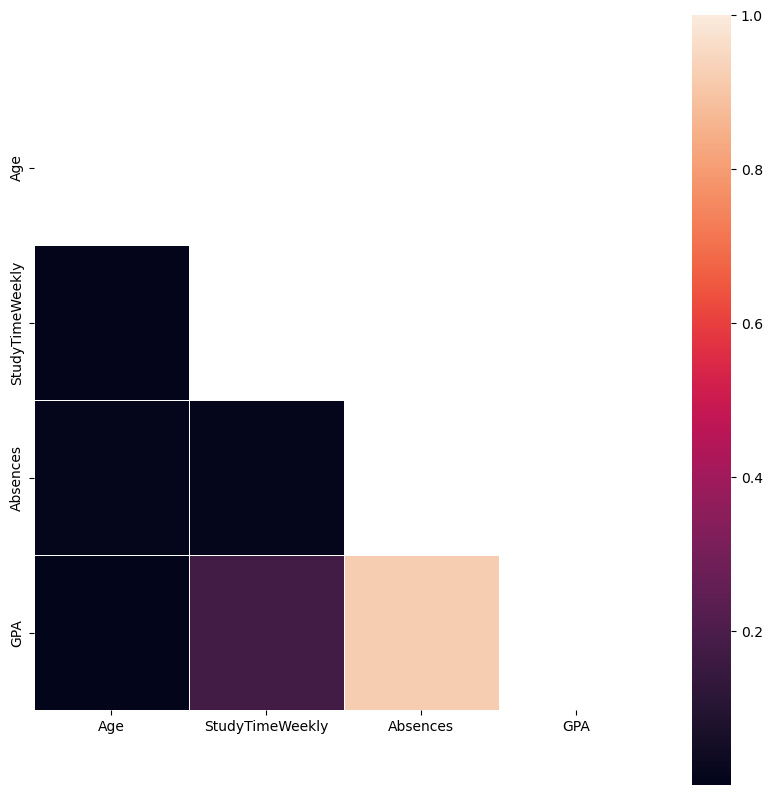

In [26]:
#heat map for numericals


#absolute value of all correlations
corr=np.abs(df[(df_model_quant_l+["GPA"])].corr()) 

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10,10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths= .5, cbar_kws={"shrink": 1},annot = corr)

plt.show()

In [27]:
# We will take absences and  StudyTimeWeekly

In [28]:
#chi-squared test for categorical

features = df[df_model_cat_l]

for col in  features.columns:
    le = LabelEncoder()
    features[col] = le.fit_transform(features[col])


target = df["GradeClass"]

chi2_scores, p_values = chi2(features, target)

# Create a DataFrame to display the results
chi2_results = pd.DataFrame({
    'Feature': features.columns,
    'Chi2 Score': chi2_scores,
    'p-value': p_values
})

round(chi2_results,4)

C:\Users\mross\AppData\Local\Temp\ipykernel_4664\2036495866.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = le.fit_transform(features[col])
C:\Users\mross\AppData\Local\Temp\ipykernel_4664\2036495866.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = le.fit_transform(features[col])
C:\Users\mross\AppData\Local\Temp\ipykernel_4664\2036495866.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

,Feature,Chi2 Score,p-value
0,Gender,0.9785,0.9130
1,Ethnicity,1.1424,0.8875
2,ParentalEducationName,3.3573,0.4999
3,Tutoring,26.3725,0.0000
4,ParentalSupportName,1.0073,0.9087
5,Extracurricular,8.7668,0.0672
6,Sports,3.0431,0.5506
7,Music,6.3376,0.1753
8,Volunteering,1.2498,0.8698


In [29]:
# based on chi 2 test 2 varibale should be kept, we'll ignore the results and build our model with all of them.
features_cat = pd.get_dummies(df[df_model_cat_l], dtype = int, drop_first=True)
features_cat.head()

,Extracurricular,Sports,Music,Volunteering,Gender_Male,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Other,ParentalEducationName_High School,ParentalEducationName_Higher,ParentalEducationName_None,ParentalEducationName_Some College,Tutoring_Yes,ParentalSupportName_Low,ParentalSupportName_Moderate,ParentalSupportName_None,ParentalSupportName_Very High
0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0
1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0
2,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0


In [38]:
features_quant = df[["StudyTimeWeekly", "Absences"]]
scaler = StandardScaler()
model = scaler.fit(features_quant)
features_quant = pd.DataFrame(model.transform(features_quant), columns=["StudyTimeWeekly", "Absences"])

In [46]:
features_og = pd.concat([features_cat, features_quant], axis = 1)
features_og.drop(columns=["Sports", "Music"])

X_train, X_test, y_train, y_test = train_test_split(features_og, target, test_size = 0.20, random_state=0)

In [47]:
y_train

1428    4.0
2384    4.0
149     2.0
1448    4.0
2164    4.0
       ... 
1033    3.0
1731    0.0
763     3.0
835     4.0
1653    4.0
Name: GradeClass, Length: 1913, dtype: float64

In [48]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6283924843423799

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy


0.6931106471816284